# Analyse de données et grands systèmes linéaires

### Importation des bibliothèques système permettant l'éxecution du programme

In [43]:
%matplotlib inline

In [44]:
from matplotlib.pyplot import * 
from numpy import * 
from scipy import * 
from scipy.sparse import * 
from numpy.linalg import *

## I. Introduction au problème :

Initialisation de la matrice K, on fixera la dimension $n = 100 $, puis à l'aide de la formule suivante : $K = (In ⊗ D^t . D) + (D^t . D ⊗ In)$, en explicitant le calcul on trouve que:


$A = D^t . D =  $$\begin{pmatrix}2 & -1 & 0 & ... & 0\\\ -1 & 2 & -1 & ... & ... \\\ 0 & ... & ... & ... & 0 \\\ 0 & ... & -1 & 2 & -1\\\ 0 & ... & 0 & 2 & -1\end{pmatrix}$ 

## II. Résolution du probléme :

### (a) Initialiser la matrice du système $K ∈ ℝ^{n*n} $ et le vecteur $f ∈ ℝ^n $ :
Initialisation de la matrice K, on fixera la dimension $n = 100 $, puis à l'aide de la formule suivante : $K = (In ⊗ D^t . D) + (D^t . D ⊗ In)$, en explicitant le calcul on trouve que:


$A = D^t . D =  $$\begin{pmatrix}2 & -1 & 0 & ... & 0\\\ -1 & 2 & -1 & ... & ... \\\ 0 & ... & ... & ... & 0 \\\ 0 & ... & -1 & 2 & -1\\\ 0 & ... & 0 & 2 & -1\end{pmatrix}$ <br/><br/>
Ou la matrice $In$ est la matrice identité, $⊗$ est le produit de Kronecker.

In [45]:
n = 10
I = eye(n)
A = diags([-1,2,-1], [-1,0,1], shape = (n, n))

In [46]:
print(I)# matrice identité
print(A)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0
  (5, 5)	1.0
  (6, 6)	1.0
  (7, 7)	1.0
  (8, 8)	1.0
  (9, 9)	1.0
  (1, 0)	-1.0
  (2, 1)	-1.0
  (3, 2)	-1.0
  (4, 3)	-1.0
  (5, 4)	-1.0
  (6, 5)	-1.0
  (7, 6)	-1.0
  (8, 7)	-1.0
  (9, 8)	-1.0
  (0, 0)	2.0
  (1, 1)	2.0
  (2, 2)	2.0
  (3, 3)	2.0
  (4, 4)	2.0
  (5, 5)	2.0
  (6, 6)	2.0
  (7, 7)	2.0
  (8, 8)	2.0
  (9, 9)	2.0
  (0, 1)	-1.0
  (1, 2)	-1.0
  (2, 3)	-1.0
  (3, 4)	-1.0
  (4, 5)	-1.0
  (5, 6)	-1.0
  (6, 7)	-1.0
  (7, 8)	-1.0
  (8, 9)	-1.0


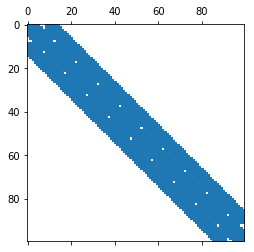

In [47]:
kron(A, I)#le produit de Kronecker
spy(A)
spy(kron(A, I))
K = kron(I, A) + kron(A, I)
spy(K)

In [48]:
print(K)

  (0, 0)	4.0
  (0, 1)	-1.0
  (0, 10)	-1.0
  (1, 0)	-1.0
  (1, 1)	4.0
  (1, 2)	-1.0
  (1, 11)	-1.0
  (2, 1)	-1.0
  (2, 2)	4.0
  (2, 3)	-1.0
  (2, 12)	-1.0
  (3, 2)	-1.0
  (3, 3)	4.0
  (3, 4)	-1.0
  (3, 13)	-1.0
  (4, 3)	-1.0
  (4, 4)	4.0
  (4, 5)	-1.0
  (4, 14)	-1.0
  (5, 4)	-1.0
  (5, 5)	4.0
  (5, 6)	-1.0
  (5, 15)	-1.0
  (6, 5)	-1.0
  (6, 6)	4.0
  :	:
  (93, 93)	4.0
  (93, 94)	-1.0
  (94, 84)	-1.0
  (94, 93)	-1.0
  (94, 94)	4.0
  (94, 95)	-1.0
  (95, 85)	-1.0
  (95, 94)	-1.0
  (95, 95)	4.0
  (95, 96)	-1.0
  (96, 86)	-1.0
  (96, 95)	-1.0
  (96, 96)	4.0
  (96, 97)	-1.0
  (97, 87)	-1.0
  (97, 96)	-1.0
  (97, 97)	4.0
  (97, 98)	-1.0
  (98, 88)	-1.0
  (98, 97)	-1.0
  (98, 98)	4.0
  (98, 99)	-1.0
  (99, 89)	-1.0
  (99, 98)	-1.0
  (99, 99)	4.0


nous avons fini avec l'initialisation de la matrice du système $K$, alors maintenant, on va initialiser le vecteur $f ∈ ℝ^n$ tel que pour tout n il faut utiliser les vecteurs $e1$ et $en$ de la base canonique de $ℝ^n$ où:
$f = (e1 ⊗ h) + (g ⊗ e1) + (en ⊗ b) + (d ⊗ en)$ <br/>
$e1 = $$\begin{pmatrix}1 \\\ 0 \\\ . \\\ .\\\ .\\\\ 0\end{pmatrix}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; , &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ en = $$\begin{pmatrix}0 \\\ 0 \\\ . \\\ .\\\ .\\\\ 1\end{pmatrix}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; , &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ h = $$\begin{pmatrix}1 \\\ 1 \\\ . \\\ .\\\ .\\\\ 1\end{pmatrix}$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; , &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ g = $$\begin{pmatrix}0 \\\ 0 \\\ . \\\ .\\\ .\\\\ 0\end{pmatrix}$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; , &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ b = $$\begin{pmatrix}0 \\\ 0 \\\ . \\\ .\\\ .\\\\ 0\end{pmatrix}$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; , &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ d = $$\begin{pmatrix}1 \\\ 1 \\\ . \\\ .\\\ .\\\\ 1\end{pmatrix}$ <br/>

In [49]:
e1 = 0 * ones(n)
e1[0] = 1
en = 0 * ones(n) 
en[n - 1] = 1

In [50]:
print("e1 = ", e1)
print("en = ", en)

e1 =  [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
en =  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


In [51]:
h = 1 * ones(n)
g = 0 * ones(n)
b = 0 * ones(n)
d = 1 * ones(n)

In [52]:
print("h = ", h)
print("g = ", g)
print("b = ", b)
print("d = ", d)

h =  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
g =  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
b =  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
d =  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [53]:
f = kron(e1, h) + kron(g, e1) + kron(en, b) + kron(d, en)
f = transpose(f)

In [54]:
print(f)

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	2.0
  (10, 0)	0.0
  (11, 0)	0.0
  (12, 0)	0.0
  (13, 0)	0.0
  (14, 0)	0.0
  (15, 0)	0.0
  (16, 0)	0.0
  (17, 0)	0.0
  (18, 0)	0.0
  (19, 0)	1.0
  (20, 0)	0.0
  (21, 0)	0.0
  (22, 0)	0.0
  (23, 0)	0.0
  (24, 0)	0.0
  :	:
  (75, 0)	0.0
  (76, 0)	0.0
  (77, 0)	0.0
  (78, 0)	0.0
  (79, 0)	1.0
  (80, 0)	0.0
  (81, 0)	0.0
  (82, 0)	0.0
  (83, 0)	0.0
  (84, 0)	0.0
  (85, 0)	0.0
  (86, 0)	0.0
  (87, 0)	0.0
  (88, 0)	0.0
  (89, 0)	1.0
  (90, 0)	0.0
  (91, 0)	0.0
  (92, 0)	0.0
  (93, 0)	0.0
  (94, 0)	0.0
  (95, 0)	0.0
  (96, 0)	0.0
  (97, 0)	0.0
  (98, 0)	0.0
  (99, 0)	1.0


### (b) Résolution des problèmes de moindres carrés :

Dans un premier temps, on va utiliser le système linéaire : $K . u = f$ pour chercher une solution approchée du système dans un sous-espace vectoriel $E ∈ ℝ^n$ de dimension $k << n$, on note la matrice $V ∈ ℝ^{n * K}$ ayant pour colonnes les k vectuers d'une base du sous espace E. tout vecteur  $v ∈ E $ s'écrit donc $v = V * α$ avec $α ∈ R^k$.
La solution $v ∈ E$ est donc obtenue en résolvant le problème des moindres carrés.<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$min ||K . V . α - f||^2$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(1)<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$α ∈ R^k$

In [55]:
v0 = solve(K.toarray(), f.toarray())

In [56]:
print(v0)#une première aproximation de u

[[ 0.5       ]
 [ 0.6979569 ]
 [ 0.79182762]
 [ 0.8445434 ]
 [ 0.87893292]
 [ 0.90450543]
 [ 0.92575374]
 [ 0.94499819]
 [ 0.9634622 ]
 [ 0.9817311 ]
 [ 0.3020431 ]
 [ 0.5       ]
 [ 0.62481017]
 [ 0.70741307]
 [ 0.76668284]
 [ 0.81333506]
 [ 0.85351134]
 [ 0.89077683]
 [ 0.92711952]
 [ 0.9634622 ]
 [ 0.20817238]
 [ 0.37518983]
 [ 0.5       ]
 [ 0.59361585]
 [ 0.66705032]
 [ 0.72864065]
 [ 0.78417971]
 [ 0.83747827]
 [ 0.89077683]
 [ 0.94499819]
 [ 0.1554566 ]
 [ 0.29258693]
 [ 0.40638415]
 [ 0.5       ]
 [ 0.57926195]
 [ 0.64999748]
 [ 0.7170886 ]
 [ 0.78417971]
 [ 0.85351134]
 [ 0.92575374]
 [ 0.12106708]
 [ 0.23331716]
 [ 0.33294968]
 [ 0.42073805]
 [ 0.5       ]
 [ 0.57499874]
 [ 0.64999748]
 [ 0.72864065]
 [ 0.81333506]
 [ 0.90450543]
 [ 0.09549457]
 [ 0.18666494]
 [ 0.27135935]
 [ 0.35000252]
 [ 0.42500126]
 [ 0.5       ]
 [ 0.57926195]
 [ 0.66705032]
 [ 0.76668284]
 [ 0.87893292]
 [ 0.07424626]
 [ 0.14648866]
 [ 0.21582029]
 [ 0.2829114 ]
 [ 0.35000252]
 [ 0.42073805]
 [ 0.5    

Là, o, puet chercher une approximation $v$ dans le sous espace affine $v0 + E$, sachant que pour tout vecteur $v ∈ v0 + E$ s'écrit $v = v0 + V * α$, cela conduit à considérer le problème de moindres carrés.<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$min ||K . V . α - r0||^2$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(2)<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$α ∈ R^k$<br />
Avec $ r0 = f - k * v0 $ est le résidu obtenu pour l'approximation $v0$.<br />
Soit $αk$ la solution du problème (2) alors : $ rk = r0 - K * V * αk $ le résidu obtenu à partir de $αk$

In [57]:
r0 = f - K * v0#le résidu obtenu par l'approximation v0

In [58]:
print(r0)

[[  0.00000000e+00]
 [  4.44089210e-16]
 [ -2.22044605e-16]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [ -4.44089210e-16]
 [ -8.88178420e-16]
 [  5.55111512e-16]
 [  0.00000000e+00]
 [ -4.44089210e-16]
 [  3.05311332e-16]
 [  5.55111512e-17]
 [  6.66133815e-16]
 [  1.11022302e-16]
 [  1.11022302e-16]
 [  3.33066907e-16]
 [ -9.99200722e-16]
 [  4.44089210e-16]
 [ -8.88178420e-16]
 [  1.11022302e-16]
 [ -2.22044605e-16]
 [  2.22044605e-16]
 [ -5.55111512e-16]
 [ -5.55111512e-16]
 [  1.11022302e-16]
 [ -5.55111512e-16]
 [  2.22044605e-16]
 [  1.11022302e-16]
 [ -1.11022302e-16]
 [  0.00000000e+00]
 [ -1.38777878e-17]
 [ -5.55111512e-17]
 [  0.00000000e+00]
 [ -1.11022302e-16]
 [ -8.88178420e-16]
 [ -5.55111512e-16]
 [  6.66133815e-16]
 [  0.00000000e+00]
 [  2.22044605e-16]
 [  2.22044605e-16]
 [ -4.16333634e-17]
 [  2.77555756e-17]
 [  5.55111512e-17]
 [  4.99600361e-16]
 [ -1.11022302e-16]
 [  3.33066907e-16]
 [ -2.22044605e-16]
 [ -2.22044605e-16]
 [ -3.33066907e-16]
 [  2.22044605e-16]


On va implémenter le procédé d'orthonormalisation de Gram-Schmidt en utilisant les bibliothèques systèmes de numpy, où $Q$ est un matrice orthogonale c'est à dire $A^t . A = A . A^t = In$ et $R$ est une matrice triangulaire supérieure.

In [59]:
def gram_schmidt(M):
    Q, R = np.linalg.qr(M)
    return Q, R

In [60]:
def moindres_carrés(K, f, v0, k):
    residus = [norm(r0)]
    V = r0
    M = K * V
    Q, R = gram_schmidt(M)
    q = (1 / norm(Q)) * Q
    rk = r0
    
    if (k <= 1):
        α = solve_triangular(R, Q.transpose() * r0, lower = False)
        v = v0 + V * α
        return residus, v, V, Q, R
    
    for i in range(2, k + 1):
        temp = q.transpose() * r0
        rk = rk - q * temp
        a = K * rk
        b = Q.transpose() * a
        s = norm(a - Q * b)
        q = (1 / s) * (a - Q * b)
        
        V = bmat([[V, rk], [None, None]])
        R = bmat([[R, b], [None, s]])
        Q = bmat([[Q, q], [None, None]])
        
        residus.append(norm(rk))
    
    α = solve_triangular(R.todense(), Q.transpose() * r0, lower = False)
    v = v0 + V * α
    return residus, v, V.todense(), Q.todense(), R.todense()

### (c) Implémentation de la méthode restarting :

Le principe de la méthode de ___restarting___ et de reboucler sur l’algorithme en repartant de la
valeur du résidu courant r k obtenu au terme de k itérations. Cela signifie, dans la description
précédente de l’algorithme, qu’on démarre une seconde fois l’ algorithme en prenant r0 = rk,
et on itère ensuite suivant la procédure normale.

In [67]:
def restarting(n_ext, k, K, f, v0):
    vk = v0
    rk = []
    solution = v0
    
    for i in range(n_ext):
        residus, vk, V, Q, R = moindres_carrés(K, f, vk, k)
        #solution = concatenate((solution,vk), axis = 1)
        solution = reshape(vk, (n, n))
        rk.extend(residus)
    
    return rk, solution, V, Q, R

In [68]:
print(restarting(10, 20, K, f, v0))

([3.3477772138571664e-15, 1.377442551109533e-15, 8.3726894126139094e-16, 6.0231099134628367e-16, 3.967527609353214e-16, 2.6772107313812501e-16, 1.8670655074161421e-16, 1.3026348304995353e-16, 8.1580611338590078e-17, 4.8276020264532321e-17, 3.1015310505900501e-17, 2.1639351024983031e-17, 1.4810680076960751e-17, 1.1457506952113096e-17, 9.8317567256448173e-18, 8.3348707017612822e-18, 6.9684623714770759e-18, 5.2264773670769799e-18, 3.3567619946948574e-18, 2.0380282025211248e-18, 3.3477772138571664e-15, 1.377442551109533e-15, 8.3726894126139094e-16, 6.0231099134628367e-16, 3.967527609353214e-16, 2.6772107313812501e-16, 1.8670655074161421e-16, 1.3026348304995353e-16, 8.1580611338590078e-17, 4.8276020264532321e-17, 3.1015310505900501e-17, 2.1639351024983031e-17, 1.4810680076960751e-17, 1.1457506952113096e-17, 9.8317567256448173e-18, 8.3348707017612822e-18, 6.9684623714770759e-18, 5.2264773670769799e-18, 3.3567619946948574e-18, 2.0380282025211248e-18, 3.3477772138571664e-15, 1.377442551109533e

### (d) Mettre le résultat obtenu sous forme de graphes pour avoir une vue d'ensemble.

Tracer les solutions obtenues $vk$ avec la fonction graphique contour (ou contourf). Pour cela il est necessaire de transformer le vecteur v k ∈ IR m en matrice n × n (m = n 2 ). Le réarrangement se fait ligne par ligne à l’aide de la fonction python reshape. 

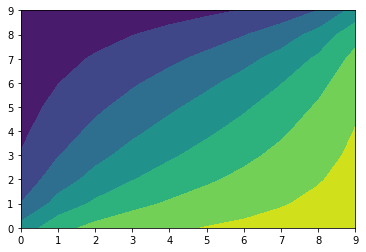

In [69]:
contourf(restarting(10, 20, K, f, v0)[1])

De même tracer la courbe de décroissance de la norme des résidus en fonction des itérés.

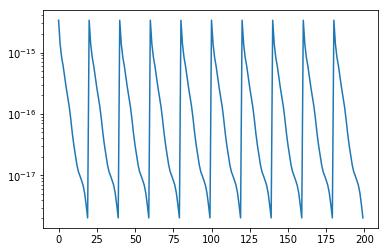

In [64]:
semilogy(restarting(10, 20, K, f, v0)[0])